## Consumption analysis
### Author : Nicolas Lacroix (https://github.com/NicolasLacroix)

Licence : [Apache License 2.0]

Data provided by [DataSud]

Source file link (csv) : https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv

[DataSud]: https://www.datasud.fr/

[Apache License 2.0]: https://github.com/NicolasLacroix/data-representation/blob/master/LICENSE

In [861]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import dateutil.parser
from datetime import datetime, date

In [862]:
data_link = 'https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv'
data = pd.read_csv(data_link, delimiter=';')

In [863]:
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-10-01,01:45,2019-10-01T01:45:00+02:00,3467.0,588.0,NaN,4.0,...,NaN,0.12,8.33,0.0,0.0,7.27,7.71,2.37,27.99,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-10-01,02:30,2019-10-01T02:30:00+02:00,3611.0,574.0,NaN,3.0,...,NaN,0.08,6.25,0.0,0.0,6.95,7.68,2.27,27.99,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-10-01,02:45,2019-10-01T02:45:00+02:00,3405.0,560.0,NaN,3.0,...,NaN,0.09,6.25,0.0,0.0,7.34,7.65,2.38,27.65,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-10-01,05:30,2019-10-01T05:30:00+02:00,3292.0,579.0,NaN,2.0,...,NaN,0.06,4.17,0.0,0.0,14.67,14.78,2.46,27.65,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-10-01,06:15,2019-10-01T06:15:00+02:00,3506.0,787.0,NaN,1.0,...,NaN,0.03,2.08,0.0,0.0,16.63,17.84,2.25,26.96,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2019-11-24,20:00,2019-11-24T20:00:00+01:00,5448.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5276,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2019-11-24,20:15,2019-11-24T20:15:00+01:00,5388.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5277,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2019-11-24,21:00,2019-11-24T21:00:00+01:00,5241.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5278,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2019-11-24,21:45,2019-11-24T21:45:00+01:00,5108.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [864]:
data['Date'] = pd.to_datetime(data['Date'])
data['Heure'] = pd.to_datetime(data['Heure'], format='%H:%M', utc=True).dt.time
data['Date - Heure'] = pd.to_datetime(data['Date - Heure'], format='%Y-%m-%dT%H:%M:%S')
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-10-01,01:45:00,2019-10-01 01:45:00+02:00,3467.0,588.0,NaN,4.0,...,NaN,0.12,8.33,0.0,0.0,7.27,7.71,2.37,27.99,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-10-01,02:30:00,2019-10-01 02:30:00+02:00,3611.0,574.0,NaN,3.0,...,NaN,0.08,6.25,0.0,0.0,6.95,7.68,2.27,27.99,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-10-01,02:45:00,2019-10-01 02:45:00+02:00,3405.0,560.0,NaN,3.0,...,NaN,0.09,6.25,0.0,0.0,7.34,7.65,2.38,27.65,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-10-01,05:30:00,2019-10-01 05:30:00+02:00,3292.0,579.0,NaN,2.0,...,NaN,0.06,4.17,0.0,0.0,14.67,14.78,2.46,27.65,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-10-01,06:15:00,2019-10-01 06:15:00+02:00,3506.0,787.0,NaN,1.0,...,NaN,0.03,2.08,0.0,0.0,16.63,17.84,2.25,26.96,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2019-11-24,20:00:00,2019-11-24 20:00:00+01:00,5448.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5276,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2019-11-24,20:15:00,2019-11-24 20:15:00+01:00,5388.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5277,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2019-11-24,21:00:00,2019-11-24 21:00:00+01:00,5241.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5278,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2019-11-24,21:45:00,2019-11-24 21:45:00+01:00,5108.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [865]:
volumeLabels = list(data.columns.values)[6:15]
percentLabels = list(data.columns.values)[15:-1]

In [866]:
def getDailyData(data, *args):
    if len(args) == 0:
        raise ValueError('args must be non-empty')
    param = []
    for elem in args:
        if type(elem) is list:
            param += elem
        else:
            param.append(elem)
    res = {}
    for date, values in data.groupby(['Date']):
        res[date.strftime('%Y-%m-%d')] = values[param]
    return res

In [867]:
dailyData = getDailyData(data, 'Date - Heure', volumeLabels)
dailyData

{'2019-10-01':                    Date - Heure  Consommation (MW)  Thermique (MW)  \
 0     2019-10-01 01:45:00+02:00             3467.0           588.0   
 1     2019-10-01 02:30:00+02:00             3611.0           574.0   
 2     2019-10-01 02:45:00+02:00             3405.0           560.0   
 3     2019-10-01 05:30:00+02:00             3292.0           579.0   
 4     2019-10-01 06:15:00+02:00             3506.0           787.0   
 ...                         ...                ...             ...   
 4240  2019-10-01 20:15:00+02:00             4468.0           870.0   
 4241  2019-10-01 20:30:00+02:00             4353.0           820.0   
 4242  2019-10-01 21:45:00+02:00             3948.0           500.0   
 4243  2019-10-01 22:45:00+02:00             3858.0           850.0   
 4244  2019-10-01 23:30:00+02:00             4413.0           787.0   
 
       Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
 0                NaN          4.0           0.0             2

In [868]:
def visualize(data, x, y=None, subplots=False, kind='line'):
    if not y:
        ax = data.plot(subplots=subplots, kind=kind, x=x)
    else:
        ax = data.plot(subplots=subplots, kind=kind, x=x, y=y)
    plt.show()

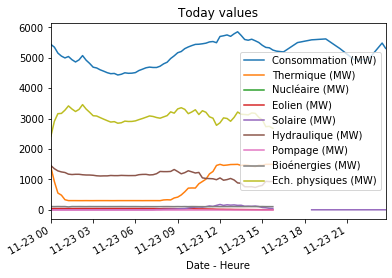

In [869]:
# Today values
today = date.today().strftime("%Y-%m-%d")
dailyData[today].plot(x='Date - Heure', title="Today values")

In [870]:
def getExtremums(data, key):
    dailyData = getDailyData(data, 'Date - Heure', volumeLabels) # get dataframes per day
    min_serie = data.loc[data[key] == min(data[key])]['Date'] # Date column of data's serie where data[key] is min
    min_df = dailyData[pd.to_datetime(min_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    max_serie = data.loc[data[key] == max(data[key])]['Date'] # Date column of data's serie where data[key] is max
    max_df = dailyData[pd.to_datetime(max_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    return min_df, max_df

In [871]:
min_df, max_df = getExtremums(data, 'Consommation (MW)')

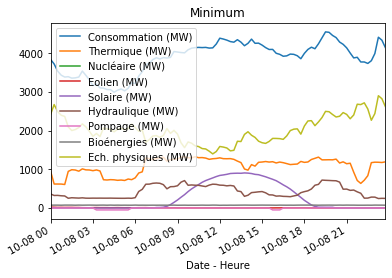

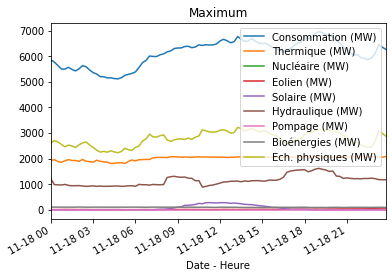

In [872]:
min_df.plot(x='Date - Heure', title="Minimum")
max_df.plot(x='Date - Heure', title="Maximum")

In [873]:
avg_df = data.mean()
avg_df

Code INSEE région        93.000000
Consommation (MW)      4420.966092
Thermique (MW)         1213.290761
Nucléaire (MW)                 NaN
Eolien (MW)              12.017081
Solaire (MW)            143.223541
Hydraulique (MW)        883.821040
Pompage (MW)             -2.197205
Bioénergies (MW)         88.627717
Ech. physiques (MW)    2059.297166
TCO Thermique (%)        26.715800
TCH Thermique (%)        37.013127
TCO Nucléaire (%)              NaN
TCH Nucléaire (%)              NaN
TCO Eolien (%)            0.279193
TCH Eolien (%)           25.035293
TCO Solaire (%)           3.237724
TCH Solaire (%)          11.102658
TCO Hydraulique (%)      19.627285
TCH Hydraulique (%)      27.044629
TCO Bioénergies (%)       2.055677
TCH Bioénergies (%)      30.248385
Column 26                      NaN
dtype: float64

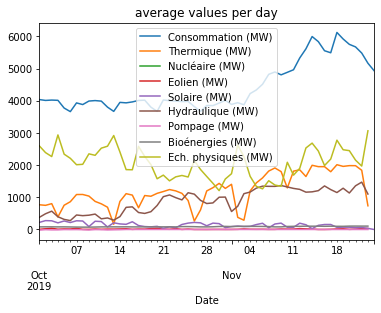

In [874]:
# average values per day
avg_day = data[['Date'] + volumeLabels].groupby(['Date']).agg(np.mean)
avg_day.plot(title="average values per day")

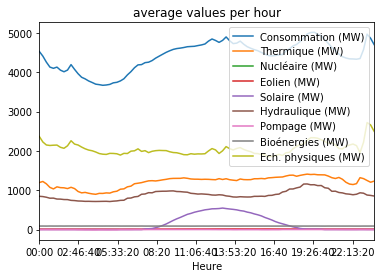

In [875]:
# average values per hour
avg_hr = data[['Heure'] + volumeLabels].groupby(['Heure']).agg(np.mean)
ax = avg_hr.plot(title="average values per hour")

Text(0, 0.5, '')

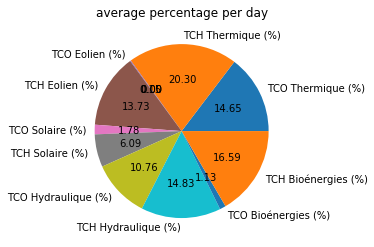

In [876]:
# average percentage per day
percent_df = data[percentLabels].mean()
ax = percent_df.plot(autopct='%.2f', kind='pie', title='average percentage per day')
ax.set_ylabel('')